# Multi-Class Classification

## Softmax Regression or Multinomial Logistic Regression
- Softmax function is also known as `normalized exponentials`

### Iris Flower Classification
- Three classes
  - Iris-Setosa
  - Iris-Versicolour
  - Iris-Virginica

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

**Load the dataset**

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print(list(iris))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Prepare the dataset**

In [ ]:
X = iris.data
y = iris.target

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (150, 4)
y.shape: (150,)


In [ ]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

**Check whether labels are numeric**

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(f'Lables: {unique}')
print(f'Counts: {counts}')

Lables: [0 1 2]
Counts: [50 50 50]


In [ ]:
print(f'type(X): {type(X)}')
print(f'type(y): {type(y)}')

type(X): <class 'numpy.ndarray'>
type(y): <class 'numpy.ndarray'>


**Visualize  the data**

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)

X_2D_pca = pca2.fit_transform(X)

print(f'PCA Features: Number of samples and attributes: {X_2D_pca.shape}')

PCA Features: Number of samples and attributes: (150, 2)


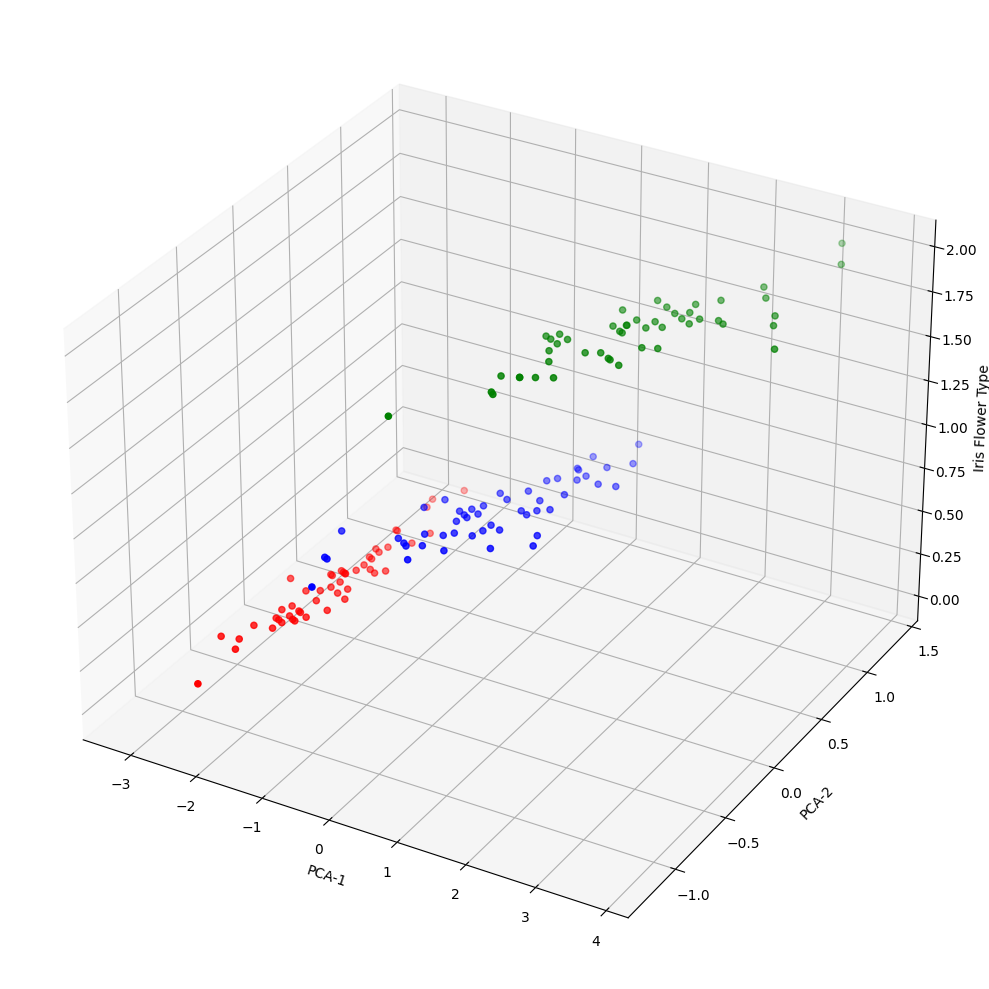

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[y==0,0], X_2D_pca[y==0,1], y[y==0], color="r");
ax.scatter(X_2D_pca[y==1,0], X_2D_pca[y==1,1], y[y==1], color="b");
ax.scatter(X_2D_pca[y==2,0], X_2D_pca[y==2,1], y[y==2], color="g");

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Iris Flower Type")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_2D_tsne = tsne2.fit_transform(X)

print(f'tSNE Embedding: Number of samples and attributes: {X_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (150, 2)


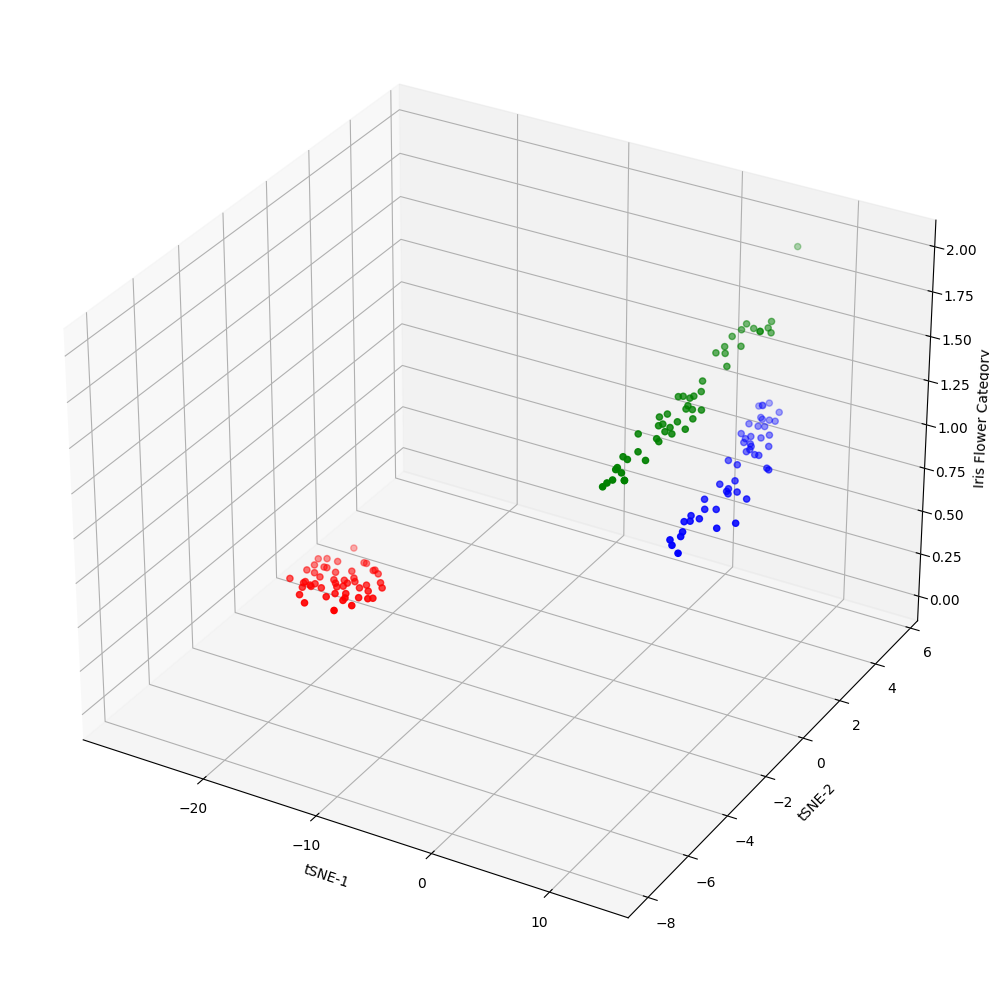

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_tsne[y==0,0], X_2D_tsne[y==0,1], y[y==0], color="r");
ax.scatter(X_2D_tsne[y==1,0], X_2D_tsne[y==1,1], y[y==1], color="b");
ax.scatter(X_2D_tsne[y==2,0], X_2D_tsne[y==2,1], y[y==2], color="g");


ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Iris Flower Category")

plt.tight_layout()
plt.show()

**Convert into Pandas DataFrame for quick analysis**

In [ ]:
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


**Split the data into 80% training and 20% testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state=42)

In [ ]:
print(f'X_train: {X_train.shape}\n X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}\n y_test: {y_test.shape}')

X_train: (120, 4)
 X_test: (30, 4)
y_train: (120,)
 y_test: (30,)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(f'Lables: {unique}')
print(f'Counts: {counts}')

Lables: [0 1 2]
Counts: [40 40 40]


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print(f'Lables: {unique}')
print(f'Counts: {counts}')

Lables: [0 1 2]
Counts: [10 10 10]


**SoftMax Regression using LogisticRegression class**

In [ ]:
from sklearn.linear_model import LogisticRegression

softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
softmax_clf.fit(X_train, y_train)
score = softmax_clf.score(X_test, y_test)

print(f'Classification accuray using raw data is {score}%')

Classification accuray using raw data is 0.9666666666666667%


In [ ]:
y_pred = softmax_clf.predict(X_test)
print(y_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [ ]:
print(y_test)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


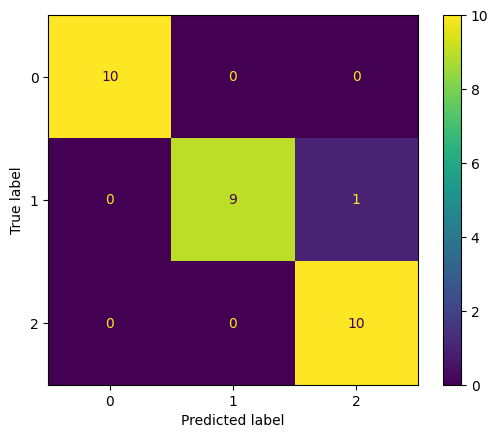

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred, average = 'weighted'))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred, average = 'weighted'))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred, average = 'weighted'))

Precision: 0.970
Recall: 0.967
F1: 0.967


In [ ]:
from sklearn import metrics

print("Classification report for classifier %s:\n%s\n"
      % (softmax_clf.predict, metrics.classification_report(y_test, y_pred)))

Classification report for classifier <bound method LinearClassifierMixin.predict of LogisticRegression(multi_class='multinomial')>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




**Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(softmax_clf, X, y, cv=10, scoring='f1_weighted')

print(cv_scores)

[1.         0.93265993 1.         1.         0.93265993 0.93265993
 0.93265993 1.         1.         1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.97 accuracy with a standard deviation of 0.03


In [ ]:
print("%0.2f +/- %.2f" % (cv_scores.mean(), cv_scores.std()))

0.97 +/- 0.03


### Exercise

1. Perform the experiment with standard scaled version of input and compare the results.

2. Repeat the experiment with only conisdering the petal attributes.

3. Report 10-Fold Cross Validation scores for both experiment.
  - If the dataset size is large, then reduce the fold.
